# <span style="color:#336699">Trabalho Final - Introdução a Programação</span>
<hr style="border:2px solid #0077b9;">

## Cálculo do Balanço de Radiação - Landsat 5##

Em Sensoriamento Remoto, o cálculo do balanço de radiação permite que o usuário possa gerar conversões radiométricas das imagens inicialmente em números digitais, bem como entender as influências atmosféricas exercidas, como atenuação da radiação eletromagnética (REM) por meio de espalhamento e absorção. São diversos os parâmetros que devem ser considerados para esse tipo de processamento, portanto automatizar esse processo torna-se uma grande contribuição, visto que a probabilidade de erros é reduzida já que o usuário não precisa refazer o procedimento passo a passo, principalmente se a pesquisa for embasada em múltiplas imagens. Dessa forma, o objetivo desse trabalho é facilitar esse tipo de processamento ao usuário, o qual deverá inserir apenas informações encontradas nos metadados da imagem ou de características gerais da área de estudo. Este trabalho é baseado na apostila do Prof.Dr. Bernardo Barbosa da Silva da UFCG (Universidade Federal de Campina Grande), que realiza o cálculo de balanço da radiação com imagens do sensor TM - Landsat 5 por meio do *Model Maker* do *software* Erdas.
 
O sensor TM - Landsat 5 mede a radiância espectral dos alvos e a armazena na forma de níveis de cinza, ou intensidade do pixel, ou ainda número digital (ND), cujos valores variam de 0 a 255 (8 bits), tendo uma resolução espacial de 30 m nas bandas 1, 2, 3, 4, 5 e 7, e de 120 m na banda 6 (banda termal, que possibilita obter a temperatura da superfície). Informações sobre essas bandas estão inclusas na Figura 1. Também estão incluídos os valores da irradiância solar monocromática (Kλ,b) das bandas reflectivas (bandas 1-5 e 7), que correspondem à radiação solar incidente sobre uma superfície normal à direção dos raios solares no topo da atmosfera terrestre, à distância de uma Unidade Astronômica (1 UA = 149,5 milhões de km) do Sol. 

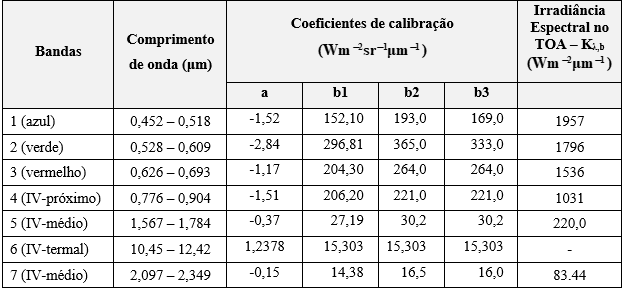
*Figura 1. Descrição das bandas do Mapeador Temático (TM) do Landsat 5, com os correspondentes intervalos de comprimento de onda, coeficientes de calibração (radiância mínima – a e máxima – b para o período: antes de maio/2003 (b1), maio/2003 a abril/2007 (b2), após abril 2007(b3)) e irradiâncias espectrais no topo da atmosfera (TOA) (Chander et al., 2009).*

O trabalho proposto depende de um pré processamento em que essas imagens em números digitais serão convertidas para valores de radiância e posteriormente para valores de reflectância. Com os valores de reflectância é possível a aplicação dos índices espectrais (NDVI, SAVI e IAF) e o cálculo do albedo planetário. Com a imagem termal em valores de radiância, calcula-se a emissividade e temperatura de superfície terrestre. Por fim, é possível o cômputo das radiações solar, atmosférica e de superfície para a determinação do saldo final de radiação (Figura 2).

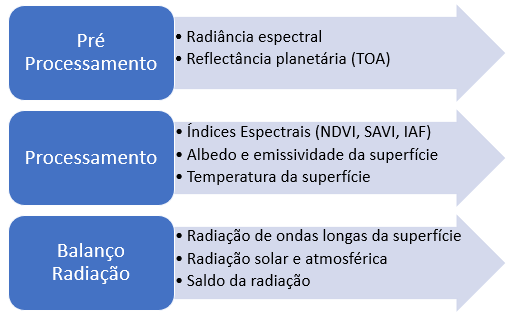
*Figura 2. Diagrama ilustrativo das etapas destinadas à obtenção do saldo de radiação à superfície.*

### Início do programa: importação das bibliotecas e da imagem do Landsat 5

In [22]:
#Códigos
from osgeo import gdal
from gdalconst import *
import numpy as np
from matplotlib import pyplot as plt
import math
import datetime as dt
from osgeo import osr

In [23]:
b1 = "C:/ser347/imagens_land5/LANDSAT_5_TM_20050222_220_075_L2_BAND1.tif"
b2 = "C:/ser347/imagens_land5/LANDSAT_5_TM_20050222_220_075_L2_BAND2.tif"
b3 = "C:/ser347/imagens_land5/LANDSAT_5_TM_20050222_220_075_L2_BAND3.tif"
b4 = "C:/ser347/imagens_land5/LANDSAT_5_TM_20050222_220_075_L2_BAND4.tif"
b5 = "C:/ser347/imagens_land5/LANDSAT_5_TM_20050222_220_075_L2_BAND5.tif"
b6 = "C:/ser347/imagens_land5/LANDSAT_5_TM_20050222_220_075_L2_BAND6_reamostragem_2_tif.tif"
b7 = "C:/ser347/imagens_land5/LANDSAT_5_TM_20050222_220_075_L2_BAND7.tif"

try:
    dataset_b1 = gdal.Open(b1, GA_ReadOnly) 
    dataset_b2 = gdal.Open(b2, GA_ReadOnly)
    dataset_b3 = gdal.Open(b3, GA_ReadOnly)
    dataset_b4 = gdal.Open(b4, GA_ReadOnly)
    dataset_b5 = gdal.Open(b5, GA_ReadOnly)
    dataset_b6 = gdal.Open(b6, GA_ReadOnly)
    dataset_b7 = gdal.Open(b7, GA_ReadOnly)
   
    print (dataset_b1.GetGeoTransform(), dataset_b2.GetGeoTransform(), dataset_b3.GetGeoTransform(),
          dataset_b4.GetGeoTransform(), dataset_b5.GetGeoTransform(), dataset_b6.GetGeoTransform(), 
          dataset_b7.GetGeoTransform())
   
    
except:
    print ("Erro na abertura de algum arquivo!")    
    
banda1 = dataset_b1.GetRasterBand(1)
banda2 = dataset_b2.GetRasterBand(1)
banda3 = dataset_b3.GetRasterBand(1)
banda4 = dataset_b4.GetRasterBand(1)
banda5 = dataset_b5.GetRasterBand(1)
banda6 = dataset_b6.GetRasterBand(1)
banda7 = dataset_b7.GetRasterBand(1)

numpy_banda1 = banda1.ReadAsArray()
numpy_banda2 = banda2.ReadAsArray()
numpy_banda3 = banda3.ReadAsArray()
numpy_banda4 = banda4.ReadAsArray()
numpy_banda5 = banda5.ReadAsArray()
numpy_banda6 = banda6.ReadAsArray()
numpy_banda7 = banda7.ReadAsArray()

(98450.0, 30.0, 0.0, 7701310.0, 0.0, -30.0) (98450.0, 30.0, 0.0, 7701310.0, 0.0, -30.0) (98450.0, 30.0, 0.0, 7701310.0, 0.0, -30.0) (98450.0, 30.0, 0.0, 7701310.0, 0.0, -30.0) (98450.0, 30.0, 0.0, 7701310.0, 0.0, -30.0) (98450.0, 29.98848442198196, 0.0, 7701310.0, 0.0, -30.0) (98450.0, 30.0, 0.0, 7701310.0, 0.0, -30.0)


In [24]:
def salvar_banda(matriz_de_pixels, nome_do_arquivo, dataset_de_referencia):
    # obter metadados
    linhas = dataset_de_referencia.RasterYSize
    colunas = dataset_de_referencia.RasterXSize
    bandas = 1
    # definir driver
    driver = gdal.GetDriverByName('GTiff')
    # copiar tipo de dados da banda já existente
    #data_type = dataset_de_referencia.GetRasterBand(1).DataType
    data_type = gdal.GDT_Float64
    # criar novo dataset
    dataset_output = driver.Create(nome_do_arquivo, colunas, linhas, bandas, data_type)
    # copiar informações espaciais da banda já existente
    dataset_output.SetGeoTransform(dataset_de_referencia.GetGeoTransform())
    # copiar informações de projeção
    dataset_output.SetProjection(dataset_de_referencia.GetProjectionRef())
    # escrever dados da matriz NumPy na banda
    dataset_output.GetRasterBand(1).WriteArray(matriz_de_pixels)
    # salvar valores
    dataset_output.FlushCache()
    # fechar dataset
    dataset_output = None

### Calibração Radiométrica

Na calibração radiométrica os números digitais (ND) de cada pixel da imagem são convertidos em radiância espectral. Essas radiâncias representam a energia solar refletida por cada pixel, por unidade de área, de tempo, de ângulo sólido e de comprimento de onda, medidas ao nível do satélite Landsat (705 Km de altitude), para as bandas 1-5 e 7. Já para a banda 6, essa radiância representa a energia eletromagnética emitida por cada pixel. A calibração é efetivada segundo a seguinte equação (Chander et al., 2009):

$$L_λ= a + \left(\dfrac{b - a} {255}\right) * (ND) $$

***Onde:*** 

***a, b:*** Coeficientes de Calibração;

***ND:*** Números Digitais;

In [25]:
#Códigos
a = [-1.52, -2.84, -1.17, -1.51, -0.37, 1.2378, -0.15]
b = [193, 365, 264, 221, 30.2, 15.303, 16.5]

radiancia_b1 = (a[0] + (((b[0] - a[0]) / 255) * numpy_banda1.astype(float)))
radiancia_b2 = (a[1] + (((b[1] - a[1]) / 255) * numpy_banda2.astype(float)))
radiancia_b3 = (a[2] + (((b[2] - a[2]) / 255) * numpy_banda3.astype(float)))
radiancia_b4 = (a[3] + (((b[3] - a[3]) / 255) * numpy_banda4.astype(float)))
radiancia_b5 = (a[4] + (((b[4] - a[4]) / 255) * numpy_banda5.astype(float)))
radiancia_b6 = (a[5] + (((b[5] - a[5]) / 255) * numpy_banda6.astype(float)))
radiancia_b7 = (a[6] + (((b[6] - a[6]) / 255) * numpy_banda7.astype(float)))

### Conversão - Reflectância

Representa o cômputo da reflectância monocromática de cada banda, definida como sendo a razão entre o fluxo da radiação solar refletido e o fluxo da radiação solar incidente, que é obtida segundo a equação:

$$ ρ_λ = \dfrac{π * L_λ} {K * cos Z* d_r} $$

***Onde:***

$L_λ$**:** Radiância de cada banda;

***K:*** Irradiância solar espectral de cada banda no topo da atmosfera;

***Z:*** Ângulo zenital;

$d_r$**:** Fator de variação da distância Sol-Terra; 

---

O $d_r$ é o quadrado da razão entre a distância média Terra-Sol ($r_o$) e a distância Terra-Sol (r) em dado dia do ano (DSA), que de acordo com Iqbal (1983), é dado por:

$$ d_r = 1 + 0,033*cos \left(\dfrac{DSA * 2π} {365}\right) $$

***Onde:***

***DSA:*** Dia do Ano Juliano;

In [26]:
elevacao = float(input("Digite o ângulo de elevação: "))


Digite o ângulo de elevação: 53.2956


In [27]:
grau = math.radians(elevacao)
cosz = math.sin(grau)

print("Cosseno do Ângulo Zenital:", cosz)

Cosseno do Ângulo Zenital: 0.8017297475629732


In [28]:
dia = int(input("Dia:"))
mes = int(input("Mês:"))
ano = int(input("Ano:"))
data = dt.date(ano, mes, dia)
data.timetuple()
doa = data.timetuple().tm_yday
print("Dia Juliano:",doa)

Dia:22
Mês:2
Ano:2005
Dia Juliano: 53


In [29]:

dr = 1 + 0.033 * math.cos(doa * 2 * math.pi / 365 )
print("dr:", dr)

dr: 1.020192251241868


In [30]:
k = [1957,1796,1536,1031,220,83.44]
r_b1 = (math.pi * radiancia_b1) / (k[0] * cosz * dr)
r_b2 = (math.pi * radiancia_b2) / (k[1] * cosz * dr)
r_b3 = (math.pi * radiancia_b3) / (k[2] * cosz * dr)
r_b4 = (math.pi * radiancia_b4) / (k[3] * cosz * dr)
r_b5 = (math.pi * radiancia_b5) / (k[4] * cosz * dr)
r_b7 = (math.pi * radiancia_b7) / (k[5] * cosz * dr)

### Albedo Planetário

O albedo planetário é obtido no topo da atmosfera do nosso planeta, ou seja,  o albedo da superfície sem correção atmosférica.  Portanto, o albedo planetário é obtido pela combinação linear das reflectâncias monocromáticas:

$$ α_{toa} = 0,293ρ_1 + 0,274ρ_2 + 0,233ρ_3 + 0,157ρ_4 + 0,033ρ_5 + 0,011ρ_7 $$

***Onde:***

$ ρ_1 , ρ_2 , ρ_3 , ρ_4 , ρ_5 , ρ_7 $**:** Albedo Planetário das bandas 1-5, 7;

---

### Albedo da Superfície 

O albedo com os efeitos atmosféricos corrigidos pode ser feito mediante a equação:

$$ α = \dfrac{α_{toa} - α_p} {Ƭ_{sw}^2} $$

***Onde:***

$α_{toa}$**:** Albedo Planetário;

$α_p$**:** Reflectância da atmosfera;

$Ƭ_{sw}$**:** Transmissividade atmosférica;

---

### Transmissividade Atmosférica

A transmissividade atmosférica, para condições de céu claro, pode ser obtida por (Allen et al., 2002):

$$ Ƭ_{sw} = 0,75 + 2*10^{-5} * h_{alt} $$

***Onde:***

$h_{alt}$ **:** Altitude de cada pixel;


In [31]:
atoa=(0.293*r_b1)+(0.274*r_b2)+(0.233*r_b3)+(0.157*r_b4)+(0.033*r_b5)+(0.011*r_b7)

In [32]:
#Transmitância:
alt=int(input("Digite a altitude(metros): "))
t=0.75+((2 * 10**-5)*alt)

#Albedo: 
alb=(atoa-0.03)/(t**2)

nome_do_arquivo = "C:/ser347/imagens_land5/imagens_teste/albsup.tif"
salvar_banda(alb, nome_do_arquivo, dataset_b1)


Digite a altitude(metros): 748


### Índices Espectrais (NDVI, SAVI, IAF):

#### NDVI:
O Índice de Vegetação da Diferença Normalizada (*Normalized Difference Vegetation Index* - NDVI) é obtido através da razão entre a diferença das refletividades do IV-próximo e do vermelho, pela soma das mesmas:

$$ NDVI = \dfrac{ρ_{IV} - ρ_V} {ρ_{IV} + ρ_V} $$

***Onde:***

$ρ_{IV}$ **:** Reflectância da banda do infravermelho;

$ρ_V$ **:** Reflectância da banda do vermelho;

---

O NDVI é um indicador sensível da quantidade e da condição da vegetação verde. Seus valores variam de –1 a +1 e para superfícies com alguma vegetação o NDVI varia de 0 e 1, já para a água e nuvens o NDVI geralmente é menor que zero.

In [35]:
#Códigos
ndvi = (r_b4 - r_b3) / (r_b4 + r_b3)

ndvi
nome_do_arquivo_ndvi = "C:/ser347/imagens_land5/imagens_teste/ndvi.tif"
salvar_banda(ndvi, nome_do_arquivo_ndvi, dataset_b1)

#### SAVI:

Para o cálculo do Índice de Vegetação Ajustado para os Efeitos do Solo (*Soil Adjusted Vegetation Index* - SAVI) que é um índice que busca amenizar os efeitos do *background* do solo, temsido utilizada a expressão (Huete, 1988):

$$ SAVI = \dfrac{(1 + F_s) *(ρ_{IV} - ρ_V)} {(F_s + ρ_{IV} + ρ_V)} $$

***Onde:***

$F_s$ **:** Fator do tipo de solo;

$ρ_{IV}$ **:** Reflectância da banda do infravermelho;

$ρ_V$ **:** Reflectância da banda do vermelho;

---
O fator $F_s$ é uma função do tipo de solo. Em estudo recente, utilizamos $F_s$ = 0,1.

In [36]:
#Códigos
savi = ((1.1) * (r_b4 - r_b3)) / (0.1 + r_b4 + r_b3)

nome_do_arquivo_savi = "C:/ser347/imagens_land5/imagens_teste/savi.tif"
salvar_banda(savi, nome_do_arquivo_savi, dataset_b1)

#### IAF:

O Índice de Área Foliar (IAF) é definido pela razão entre a área foliar de toda a vegetação por unidade de área utilizada por essa vegetação. O IAF é um indicador da biomassa de cada pixel da imagem e o mesmo foi computado pela seguinte equação empírica obtida por Allen et al. (2002):

$$ IAF = -  \dfrac{ln\left(\dfrac{0,69 - SAVI} {0,59}\right)} {0,91} $$


In [37]:
#Códigos
teste_savi = np.where(savi>0.69, 0.689, savi)
iaf = -(np.log((0.69-teste_savi)/0.59)/0.91)

nome_do_arquivo_iaf = "C:/ser347/imagens_land5/imagens_teste/iaf.tif"
salvar_banda(iaf, nome_do_arquivo_iaf, dataset_b1)

### Emissividades

Para a obtenção da temperatura da superfície, é utilizada a equação de Planck invertida, válida para um corpo negro. Como cada pixel não emite radiação eletromagnética como um corpo negro, há a necessidade de introduzir a emissividade de cada pixel no domínio espectral da banda termal $ε_{NB}$ , qual seja: 10,4 – 12,5 μm. Por sua vez, quando do cômputo da radiação de onda longa emitida por cada pixel, há de ser considerada a emissividade no domínio da banda larga $ε_0$ (5 – 100 μm). Segundo Allen et al. (2002), as emissividades podem ser obtidas, para NDVI > 0 e IAF < 3, segundo:

$$ ε_{NB} = 0,97 + 0,0033 * IAF $$

$$ ε_0 = 0,95 + 0,01 * IAF $$

***Onde:***

$ε_{NB}$ **:** Emissividade de cada pixel na banda Termal;

$ε_0$ **:** Emissividade no domínio da banda larga;

In [38]:
#Códigos
enb = 0.97 + 0.0033 * iaf
eo = 0.95 + 0.01 * iaf



### Temperatura de Superfície

Para a obtenção da temperatura da superfície ($T_s$) são utilizadas a radiância espectral da banda termal   e a emissividade   obtida na etapa anterior. Dessa forma, obtém-se a temperatura da superfície (K) pela seguinte expressão:

$$ T_s = \dfrac{K_2} {ln\left(\dfrac{ε_{NB} * K_1} {L_{λ6}}+1\right)}  $$

***Onde:***

***K1, K2*** **:** Parâmetros de calibração para a banda Termal, obtidas no metadado; 

$L_{λ6}$**:** Radiância da banda Termal;

$ε_{NB}$ **:** Emissividade de cada pixel na banda Termal;

In [39]:
#Códigos
kt1 = 607.76
kt2 = 1260.56

ts = kt2 / np.log(((enb*kt1)/radiancia_b6)+1)

nome_do_arquivo_ts = "C:/ser347/imagens_land5/imagens_teste/temp_sup.tif"
salvar_banda(ts, nome_do_arquivo_ts, dataset_b1)

### Radiação de Onda Longa Emitida

A radiação de onda longa emitida pela superfície $R_{ol,emi}$ (W/m²) é obtida através da equação de Stefan-Boltzman:

$$ R_{ol,emi} = ε_0 * σ * T_S ^4 $$

***Onde:***

$T_S$ **:** Temperatura de Superfície;

***σ :*** Constante de Stefan-Boltzman;

$ε_0$ **:** Emissividade no domínio da banda larga;


In [40]:
#Códigos
boltzman = 5.67 * 10 ** -8
Rol = eo * boltzman * (ts**4)
nome_do_arquivo_Rol = "C:/ser347/imagens_land5/imagens_teste/Rol.tif"
salvar_banda(Rol, nome_do_arquivo_Rol, dataset_b1)


### Radiação de Onda Curta Incidente

A radiação de onda curta incidente $R_{sol,inc}$ (W/m²) é o fluxo de radiação solar direta e difusa que atinge a superfície terrestre, que para condição de céu claro é dada pela seguinte expressão (Allen et al., 2002):

$$ R_{sol,inc} = S * cosZ * d_r * Ƭ_{sw} $$

***Onde:***

***S :*** Constante Solar;

***Z :*** Ângulo zenital;

$Ƭ_{sw}$**:** Transmissividade atmosférica;

$d_r$**:** Fator de variação da distância Sol-Terra;

In [41]:
#Códigos
S = 1367

Rsol = S * cosz * dr * t


### Radiação de onda longa incidente

A radiação de onda longa incidente emitida pela atmosfera na direção da superfície $R_{ol,atm}$ (W/m²), pode ser computada pela equação de Stefan-Boltzmann:

$$ R_{ol,atm} = ε_a * σ * T_{ar} ^4 $$

***Onde:***

$ε_a$**:** Emissividade da atmosfera;

$T_{ar}$**:** Temperatura do ar;

***σ :*** Constante de Stefan-Boltzman;


In [42]:
#Códigos
ta=float(input("Digite a temperatura média do ar: "))
ea = 0.85 * ((-math.log(t))**0.09)


Digite a temperatura média do ar: 26.14


In [43]:
Rolatm = ea * boltzman * ((ta+273.15)**4)

### Saldo de radiação

O saldo de radiação à superfície $R_n$ (W/m²) é computado utilizando-se a seguinte equação do balanço de radiação à superfície:

$$ R_n = R_{sol,inc}(1 - α_{sup}) - R_{ol,emi} + R_{ol,atm} - (1 - ε_0)R_{ol,atm} $$

***Onde:***

$α_{sup}$**:** Albedo de cada pixel corrigido;

$ε_0$ **:** Emissividade no domínio da banda larga;

$R_{sol,inc}$**:** Radiação de Onda Curta incidente;

$R_{ol,emi}$**:** Radiação de Onda Longa emitida;

$R_{ol,atm}$**:** Radiação de Onda Longa incidente;


In [44]:
#Códigos
Rn = (Rsol * (1 - alb)) - Rol + Rolatm - ((1-eo)*Rolatm)

nome_do_arquivo_rn = "C:/ser347/imagens_land5/imagens_teste/rn.tif"
salvar_banda(Rn, nome_do_arquivo_rn, dataset_b1)




Valores dos indices de vegetação, temperatura de superfície, saldo de radiação, radiação de onda longa emitida
específicos por coordenadas

In [82]:
srs_wgs84 = osr.SpatialReference()
srs_wgs84.ImportFromProj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
srs_wgs84.ExportToWkt()
srs_wkt = dataset_b1.GetProjection()
srs_utm = osr.SpatialReference()
srs_utm.ImportFromWkt(srs_wkt)
srs_utm.ExportToProj4()
srs_transform = osr.CoordinateTransformation(srs_wgs84, srs_utm)

lat=float(input("Digite a latitude: "))

long=float(input("Digite a longitude: "))


cols = dataset_b1.RasterXSize
rows = dataset_b1.RasterYSize

transform = dataset_b1.GetGeoTransform()

xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = transform[5]

data = banda1.ReadAsArray(0, 0, cols, rows)
x, y, z = srs_transform.TransformPoint(long, lat)

col = int( (x - xOrigin) / pixelWidth )
linha = int( (y - yOrigin) / pixelHeight )

l = dataset_b1.RasterYSize
c = dataset_b1.RasterXSize

if linha in range(0,l) and col in range(0, c):
     print("NDVI:", ndvi[linha, col], "SAVI:", savi[linha, col], "IAF:", iaf[linha, col], 
      "TS:", ts[linha, col], "Rol", Rol[linha, col],"Rn:", Rn[linha, col])
else:
    print("Coordenada fora da imagem. Por gentileza, insira uma coordenada dentro da imagem.")
   


Digite a latitude: -21
Digite a longitude: -48
NDVI: 0.5900126461856275 SAVI: 0.4974545395429694 IAF: 1.2305387393786245 TS: 298.8547086547907 Rol 435.24760230062816 Rn: 632.0000544200985


### Referências

(Chander et al., 2009)
Iqbal (1983)
(Allen et al., 2002)
(Huete, 1988)
(Huete &Warrick, 1990; Accioly et al., 2002; Boegh et al., 2002